# This project aims to find linguistic features that can be used to predict English test scores of non-native speakers.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/mnt/c/Users/Asus/Documents/Project/texts_spoken.csv", sep = "\t") 
from scipy.stats import pearsonr

### This dataset contains the transcripts of descrptions of Charlie Chaplin's movies recorded by 198 non-native speakers of English.

In [31]:
# explore the data
df.head(3)

,Subcorpus,Filename,Year data collection,Placement test score (raw),Placement test score (%),Proficiency,Sex,Age,School/University/Institution,Major,...,Proficiency (self-assessment) in additional language writing,Medium,Task number,Task title,Writing/audio details,Minutes taken to complete the task,Where the task was done,Resources used,Text,Original text
0,Learners,DE_SP_B1_33_10_14_JR,2018,38 / 60,63.3,B1 (lower intermediate),Female,33,Universität Bremen,"English-Speaking Cultures, Philosophie",...,B1 (lower intermediate),Spoken,14,14. Chaplin,spoken_offline_lab,NaN,NaN,NaN,Ok this story is about toch uh Charles Chaplin...,NaN
1,Learners,DE_SP_B2_20_12_14_EB,2018,43 / 60,71.7,B2 (upper intermediate),Female,20,Universität Bremen,English Speaking Cultures,...,B1 (lower intermediate),Spoken,14,14. Chaplin,spoken_offline_lab,NaN,NaN,NaN,uh in the clip Charlie Chaplin walks down a di...,NaN
2,Learners,DE_SP_B2_18_16_14_LN,2019,44 / 60,73.3,B2 (upper intermediate),Female,18,Universität Bremen,English-Speaking Cultures,...,A1 (lower beginner),Spoken,14,14. Chaplin,spoken_offline_lab,NaN,NaN,NaN,okay so the uh man in the clip uh was on a wal...,NaN


In [32]:
df["Proficiency"].value_counts()

C1 (lower advanced)        62
B2 (upper intermediate)    45
C2 (upper advanced)        38
B1 (lower intermediate)    37
A2 (upper beginner)        13
A1 (lower beginner)         3
Name: Proficiency, dtype: int64

In [33]:
# Look at the textual data of A2 (upper beginner) English speakers as there are too few A1 (lower begginer) English speakers
for i in df[df["Proficiency"] == "A2 (upper beginner)"]["Text"].head(5):
    print(i)

a man was walking for a xxx when / when he find a newborn alone 'n' crying / after looking around he decide to pick up the baby and give him to one mother / that was over there / with other baby in the baby cart / but this woman refuse and he said that to leave the baby where / he had been found it just the moment / in which / a policeman / appears / when he give the baby to a man who was walking with their / and this man leave / the baby casually to the same woman than before / hhh this woman thinks he have left her the child again and tries to return him / it happens just when Chaplin go walking over there 'n' the woman see her and say to the policeman what he xxx is planning to do / finally he discover a note where he can read / that the baby in an orphan child / and / he decide to keep it
uh well uh this video / this story is about uh / a poor man / Charles Chaplin / uh / he's wal= walking uh he'll he's walking down a street uh / uh smoking a cigarette uh when he / suddenly find a 

In [34]:
# Look at the textual data of C2 (advanced) English speakers 
for i in df[df["Proficiency"] == "C2 (upper advanced)"]["Text"].head(5):
    print(i)

in the short clip you see Charlie Chaplin walking down a dusty road and he gets hit by rubbish that people throw out of the windows uh and he loses his ciga= cigar so uh when he lights a news one he throws his gloves uh in a trashcan and then he sees a baby laying on the ground uh he picks it up and yeah tries to figure out where / or who= whom it belong to and sees a woman with a pram so he thinks alright it’s her baby she lost it and the woman is in a shop but the pram is outside on the street so he puts it in there uh and then the woman sees it and yeah hurries out and shouts at him that this is not her baby and uh he picks it up and yeah walks back to the spot where he found it and as he puts it on the ground again he notices that there is a police officer coming along and he yeah to avoid confrontation he picks it up again quickly and hurries away then he sees a or he walks past uh a man with a limp and he fools him into uh holding the baby while he pretends to tie his shoe and as

####

In [35]:
import nltk
from nltk import word_tokenize, pos_tag
import pandas as pd
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/usk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/usk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
# add linguistic features
df["uh"] = df["Text"].str.lower().str.count(r"\buh\b")
df["hhh"] = df["Text"].str.lower().str.count(r"\bhh+\b")
df["/"] = df["Text"].str.lower().str.count(r"\/")
df["um"] = df["Text"].str.lower().str.count(r"\bum\b")
df["level"] = df["Proficiency"].apply(lambda x: "C" if x in ['C1 (lower advanced)', 'C2 (upper advanced)'] else "B" if x in ['B1 (lower intermediate)', 'B2 (upper intermediate)'] else "A")
df["Speech_len"] = df["Text"].apply(lambda x: len(x))
df["pause and filler rate"] = (df["/"] + df["uh"] + df["um"] + df["hhh"]) / df["Speech_len"]
df["pause and filler rate"] = df["pause and filler rate"]*100
df["Text_clean"] = df["Text"].str.replace(r"\buh\b", "").str.replace(r"\bhh+\b", "").str.replace(r"\/", "").str.replace(r"\bum\b", "").str.replace(r"\s+", " ").str.strip()
df["adverb count"] = df["Text_clean"].apply(lambda x: len([i for i in word_tokenize(x) if pos_tag([i])[0][1] in ["RB", "RBR", "RBS"]]))
df["pronoun count"] = df["Text_clean"].apply(lambda x: len([i for i in word_tokenize(x) if pos_tag([i])[0][1] in ["PRP", "PRP$"]]))
df["adverb_rate"] = df["adverb count"] / df["Speech_len"]
df["pronoun_rate"] = df["pronoun count"] / df["Speech_len"]
df["adverb_rate"] = df["adverb_rate"]*100
df["noun count"] = df["Text_clean"].apply(lambda x: len([i for i in word_tokenize(x) if pos_tag([i])[0][1] in ["NN", "NNS", "NNP", "NNPS"]]))
df["noun_rate"] = df["noun count"] / df["Speech_len"]
df["verb count"] = df["Text_clean"].apply(lambda x: len([i for i in word_tokenize(x) if pos_tag([i])[0][1] in ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]]))
df["verb_rate"] = df["verb count"] / df["Speech_len"]
df["adjective count"] = df["Text_clean"].apply(lambda x: len([i for i in word_tokenize(x) if pos_tag([i])[0][1] in ["JJ", "JJR", "JJS"]]))
df["adjective_rate"] = df["adjective count"] / df["Speech_len"]

/tmp/ipykernel_356/4057459991.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Text_clean"] = df["Text"].str.replace(r"\buh\b", "").str.replace(r"\bhh+\b", "").str.replace(r"\/", "").str.replace(r"\bum\b", "").str.replace(r"\s+", " ").str.strip()


In [37]:
import spacy

nlp = spacy.load('en_core_web_sm')

def calculate_vocab_size_nlp(text):
    doc = nlp(text)
    unique_words = set(token.lemma_ for token in doc if token.is_alpha)
    return len(unique_words)

df['Vocab size'] = df['Text_clean'].apply(calculate_vocab_size_nlp)
df["Vocab size rate"] = df["Vocab size"] / df["Speech_len"]



#### First, we will look at the relationship between the pause and filler rate and the proficiency level of the speaker.

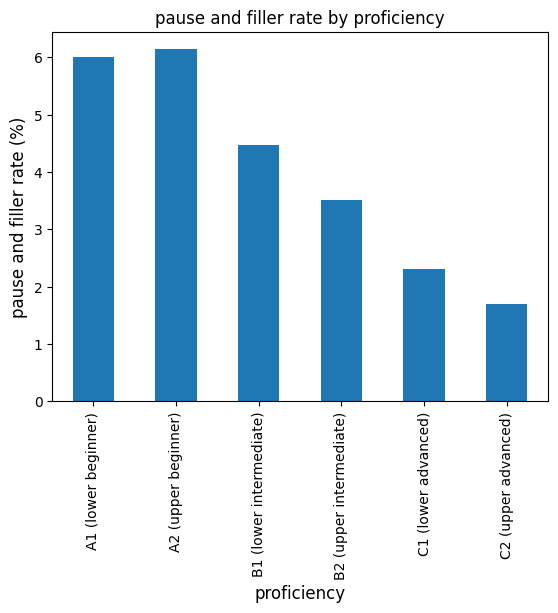

In [38]:
df.groupby("Proficiency")["pause and filler rate"].mean().plot(kind = "bar")
plt.xlabel("proficiency", fontsize = 12)
plt.ylabel("pause and filler rate (%)", fontsize = 12)
plt.title("pause and filler rate by proficiency")
plt.show()

### Looks like there is a negative trend between the pause rate and the proficiency level of the speaker. The higher the proficiency level, the lower the pause rate. This makes sense because the more proficient the speaker is, the more fluent they are, and the less likely they are to pause.

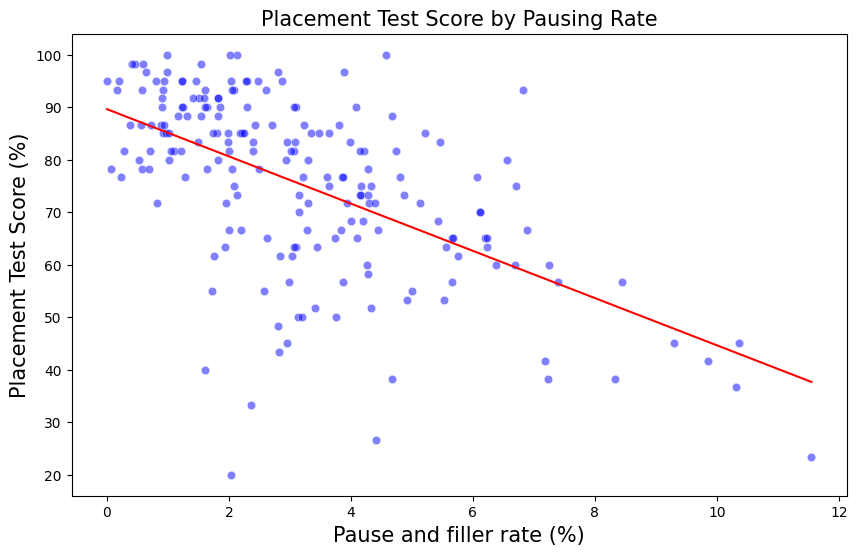

PearsonRResult(statistic=-0.5924028647277899, pvalue=3.823957608573503e-20)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['pause and filler rate']]
y = df['Placement test score (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['pause and filler rate'], y=df['Placement test score (%)'], color='blue', alpha=0.5)
sns.lineplot(x=df['pause and filler rate'], y=y_pred, color='red')
plt.title('Placement Test Score by Pausing Rate', fontsize=15)
plt.xlabel('Pause and filler rate (%)', fontsize=15)
plt.ylabel('Placement Test Score (%)', fontsize=15)
plt.show()

pearsonr(df['pause and filler rate'], df['Placement test score (%)'])

### It's statistically significant with the p-value less than 0.05, so we can reject the null hypothesis that there is no relationship between the pause rate and the proficiency level of the speaker. In fact, Pearson correlation coeficient (R) = -0.59 indicates that there is a negative correlation between the two.

### Now, let's explore if there is any relationship between adverb usage rate and English proficiency

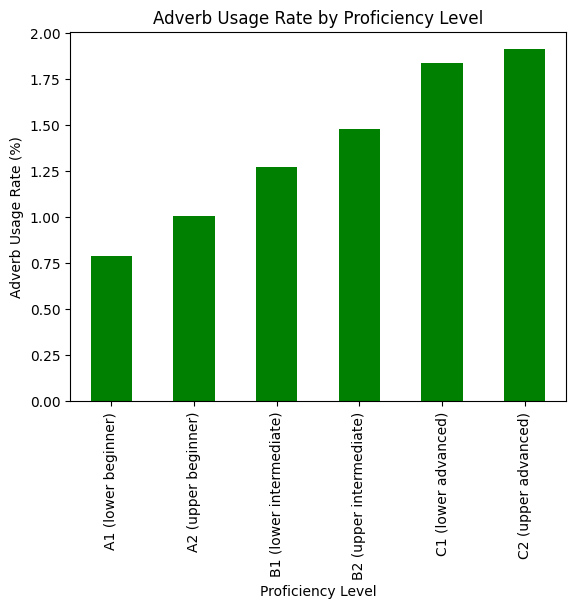

In [40]:
df.groupby("Proficiency")["adverb_rate"].mean().plot.bar(color="green")
plt.title("Adverb Usage Rate by Proficiency Level")
plt.xlabel("Proficiency Level")
plt.xticks(rotation=90)
plt.ylabel("Adverb Usage Rate (%)")
plt.show()

#### Looks like there is a relationship between adverb usage rate and English proficiency. Let's explore further.

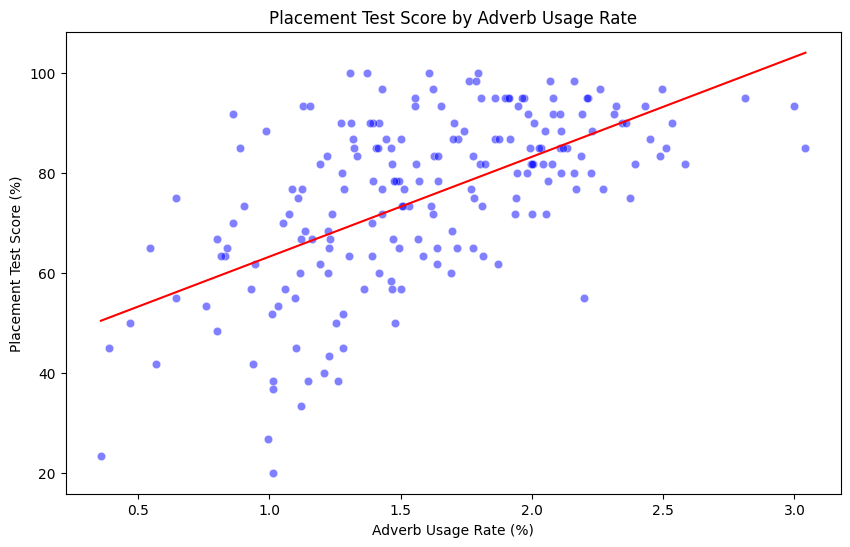

PearsonRResult(statistic=0.5827273818750521, pvalue=2.130953070498319e-19)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['adverb_rate']]
y = df['Placement test score (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['adverb_rate'], y=df['Placement test score (%)'], color='blue', alpha=0.5)
sns.lineplot(x=df['adverb_rate'], y=y_pred, color='red')
plt.title('Placement Test Score by Adverb Usage Rate')
plt.xlabel('Adverb Usage Rate (%)')
plt.ylabel('Placement Test Score (%)')
plt.show()
pearsonr(df['adverb_rate'], df['Placement test score (%)'])

### R = 0.58 indicates a possitive correlation between adverb usage rate and English proficiency. Let's look at other POS tags.

In [42]:
print(f'Adjective and test scores {pearsonr(df["Placement test score (%)"], df["adjective_rate"])}')
print(f'Noun and test scores {pearsonr(df["Placement test score (%)"], df["noun_rate"])}')
print(f'Verb and test scores {pearsonr(df["Placement test score (%)"], df["verb_rate"])}')
print(f'Pronoun and test scores {pearsonr(df["Placement test score (%)"], df["pronoun_rate"])}')

Adjective and test scores PearsonRResult(statistic=0.1609979566292818, pvalue=0.023457483521836173)
Noun and test scores PearsonRResult(statistic=0.21951890139713884, pvalue=0.0018878041816100682)
Verb and test scores PearsonRResult(statistic=-0.18597849564192104, pvalue=0.008708084598838248)
Pronoun and test scores PearsonRResult(statistic=0.2447506069692543, pvalue=0.0005105759058993644)


### It appears that adverb usage rate is the most correlated with English proficiency.

### Now, let's look at the relationship between correct usage rate of 3rd person verb agreement and English proficiency.

In [43]:
# Function to detect incorrect third-person singular verb conjugationsimport spacy

def analyze_verb_conjugations(text, nlp):
    doc = nlp(text)
    correct_count = 0
    incorrect_count = 0

    for token in doc:
        if token.pos_ == "VERB" and (token.tag_ == "VBZ" or token.tag_ == "VBP"):
            for child in token.children:
                if child.dep_ == "nsubj" and (child.tag_ in ["NN", "NNP"] or child.text.lower() in {"he", "she", "it"}):
                    if (child.tag_ in ["NN", "NNP"] and token.tag_ == "VBZ") or \
                       (child.text.lower() in {"he", "she", "it"} and token.tag_ == "VBZ"):
                        correct_count += 1
                    else:
                        incorrect_count += 1
                    break
    total_count = correct_count + incorrect_count
    return correct_count, incorrect_count, total_count

# Apply the function to each text in the DataFrame and add the error proportion
df['correct_count'], df['incorrect_count'], df['total_count'] = zip(*df['Text'].apply(lambda text: analyze_verb_conjugations(text, nlp)))

# Calculate the error proportion for each text
df['error_proportion'] = df.apply(lambda row: row['incorrect_count'] / row['total_count'] if row['total_count'] > 0 else 0, axis=1)
# Calculate the correct proportion for each text
df['correct_proportion'] = 1 - df["error_proportion"]


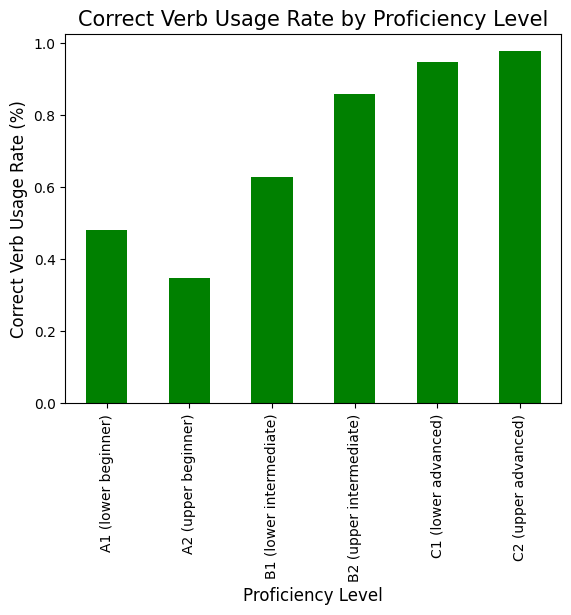

PearsonRResult(statistic=0.607353857555092, pvalue=2.3944072463596603e-21)

In [44]:
df.groupby("Proficiency")["correct_proportion"].mean().plot.bar(color="green")
plt.title("Correct Verb Usage Rate by Proficiency Level", fontsize = 15)
plt.xlabel("Proficiency Level", fontsize = 12)
plt.ylabel("Correct Verb Usage Rate (%)", fontsize = 12)
plt.show()
pearsonr(df["correct_proportion"], df["Placement test score (%)"])

#### R = 0.60! It's the most correlated feature so far.

In [45]:
#df_2 = pd.read_csv("/mnt/c/Users/Asus/Documents/Project/newdf_with_correct_total_ratio.csv")
#df_2.plot.scatter(y = "Placement_Test_Score_Proportion", x = "Correct_Total_Ratio") 

In [46]:
import spacy

nlp = spacy.load("en_core_web_sm")

def find_passive_verbs(text):
    doc = nlp(text)
    passive_verbs = []

    for sent in doc.sents:
        for token in sent:
            if token.dep_ == "auxpass" and token.head.pos_ == "VERB":
                passive_verbs.append(token.head.text)  

    return passive_verbs

df['passive_verbs'] = df['Text'].apply(find_passive_verbs)
df["passive_count"] = df["passive_verbs"].apply(lambda x: len(x))
df["passive_rate"] = df["passive_count"]/df["Speech_len"]


In [47]:
pearsonr(df["passive_rate"], df["Placement test score (%)"])

PearsonRResult(statistic=0.3228582191685722, pvalue=3.499397824382243e-06)

In [48]:
import spacy

nlp = spacy.load("en_core_web_sm")

def find_phrasal_verbs(text, nlp):
    doc = nlp(text)
    phrasal_verbs = set()

    for token in doc:
        # Check if the token is a verb
        if token.pos_ == "VERB":
            # Look for the prepositional or adverbial particle
            for child in token.children:
                if child.dep_ == "prep" or child.dep_ == "prt":
                    # Lemmatize the verb and the particle to ensure consistency
                    verb_lemma = token.lemma_.lower()
                    particle_lemma = child.lemma_.lower() if child.pos_ == "VERB" else child.text.lower()
                    # Add the phrasal verb as a tuple to the set to ensure uniqueness
                    phrasal_verbs.add((verb_lemma, particle_lemma))
    return phrasal_verbs

df["phrasal_verbs"] = df["Text"].apply(lambda x: find_phrasal_verbs(x, nlp))
df["phrasal_count"] = df["phrasal_verbs"].apply(lambda x: len(x))
df["phrasal_rate"] = df["phrasal_count"] / df["Speech_len"]

In [49]:
pearsonr(df["phrasal_rate"], df["Placement test score (%)"])

PearsonRResult(statistic=0.2599982313594486, pvalue=0.00021631702894554745)

#### It's a bit counterintuitive that there is a little correlation between English proficiency and phrasal verb usage rate. 
### Therefore, we can conclude that the most correlated features with English proficiency are: 3rd person verb agreement, adverb usage rate, and pause rate.

# Create a multiple linear regression model to predict English test scores based on these linguistic features!

In [50]:
# Multiple Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[["pause and filler rate", "correct_proportion", "adverb_rate"]] # independent variables
y = df['Placement test score (%)']  # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # split the data into training and testing sets

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R-squared: {r2}')


MSE: 102.92612437950052, R-squared: 0.5916654770912013


### R-squared = 0.59 indicates that 59% of the variation in English proficiency can be explained by adverb usage rate, pausing rate and correct usage rate of 3rd person verb agreement.

### Now, we will use the model to predict the English proficiency of the test set (20% of the corpus data).

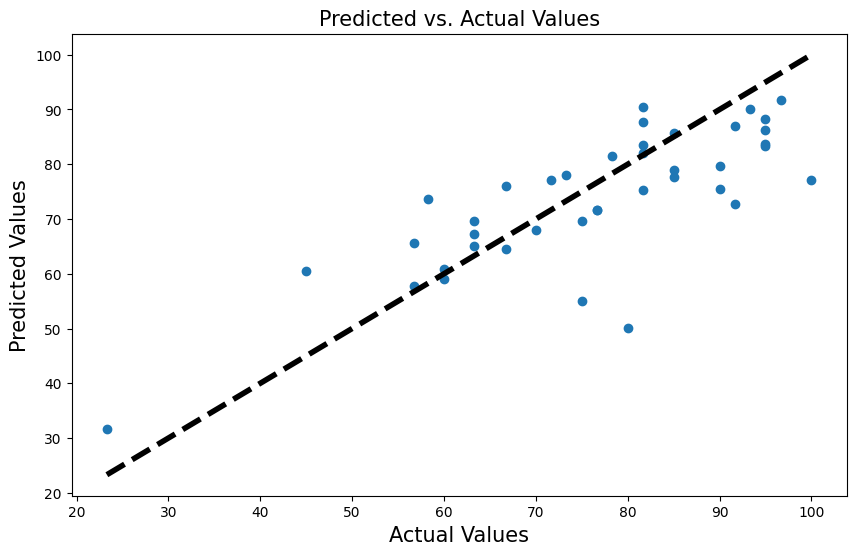

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('Predicted vs. Actual Values', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


### The actual values of the test set do not deviate much from the predicted values. The model seems to be doing a good job!

## Conclusion: The most correlated features with English proficiency were: 3rd person verb agreement, adverb usage rate, and pause rate. The multiple linear regression model including these features as independent variables can predict English proficiency test scores with little error.